In [24]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math, os, sys, math
import pandas as pd
import numpy as np
import seaborn as sns
import textwrap

In [98]:
# Plotting methods

def plot_distributions(start, num, df, save_path = None, disp = False):
    total_row = math.ceil(num/3)
    fig_length = total_row * 1.25
    fig = plt.figure(figsize = (4, fig_length),facecolor = 'white', dpi = 300)
    
    for i in range(num):
        row = i + start
        ax = fig.add_subplot(total_row, 3, i+1)

        y_neg = (df.loc[:,df.iloc[-1,:] == -1]).iloc[row, :]
        y_norm = (df.loc[:,df.iloc[-1,:] == 0]).iloc[row, :]
        y_large = (df.loc[:,df.iloc[-1,:] == 1]).iloc[row, :]
        
        mean_series = pd.concat([y_neg, y_norm, y_large])
        num_size = len(str(int(np.mean(mean_series))))
    
        if num_size > 4:
            div = 10**num_size
            y_neg = y_neg/div
            y_norm = y_norm/div
            y_large = y_large/div
        for  data, color, lab in zip([y_neg, y_norm, y_large], ['red', 'grey', 'blue'], ['Small', 'Normal', 'Large']):
            ax = sns.kdeplot(data, color = color, alpha = 0.4, shade = True, legend = lab, linewidth = 0.3)
            ax.set_title('test')
            ax.set(xlabel = None)
            ax.set(ylabel = None)
            
            title = df.index[row].replace('_', ' ').title()
            t_l = title.split(' ')[4:]
            title = ' '.join(t_l)
            title = textwrap.fill(title, 20)

            #fig.suptitle(title, ha = 'center', size = 20, weight = 'bold')
            #fig.tight_layout(rect=[0, 0.03, 1, 0.90])
            font_dict = {'ha':'center', 'fontsize':5, 'fontweight':'normal'}
            ax.axes.yaxis.set_visible(False)
            ax.set_title(title, fontdict = font_dict)


            for label in (ax.get_xticklabels() + ax.get_yticklabels()):
                label.set_fontsize(5)
    
    custom_lines = [Line2D([0], [0], color='red', lw=4),
                    Line2D([0], [0], color='grey', lw=4),
                    Line2D([0], [0], color='blue', lw=4)]
    
    fig_title = ' '.join(df.index[row].replace('_', ' ').title().split(' ')[:4])
    fig.suptitle(fig_title, va = 'top', fontsize = 15)
    fig.legend(custom_lines, ['Small', 'Normal', 'Large'], loc = 'upper right',  fontsize = 3 )#, bbox_to_anchor=(0.48, 0.93))
    plt.tight_layout(rect=[0, 0, 0.95, 0.94])
    
    if save_path is not None:
        out_file = os.path.join(save_path, fig_title.replace(' ', '_') + '.png')
        plt.savefig(out_file, format = 'png', dpi = 300, bbox_inches = 'tight')
    if save_path is None or disp:
        plt.show()
    plt.close()
    
def plot_all_dist(df, save_path = None, disp = False):
    lens = [0, 0, 0, 0]
    for enum, name in enumerate(df.index):
        if '_shape_' in name:
            lens[0]+=1
        elif '_firstorder_' in name:
            lens[1]+=1
        elif '_glcm_' in name:
            lens[2]+=1
        elif '_glrlm_' in name:
            lens[3]+=1
    start = 0
    for l in lens:
        if l == 0:
            continue
        plot_distributions(start, l ,df, save_path, disp)
        start+=l

In [77]:
# other methods

def summary_df(df):
    summary_dict = {'Mean':df.mean(axis=1), 'Std_Dev':df.std(axis=1),'Min':df.min(axis=1),
                    'Max':df.max(axis=1)}

    return pd.DataFrame.from_dict(summary_dict)

In [16]:
# Setup directories and Load DataFrame

storage_dir = '/media/billy/18CC-A3D3/bioeng1340/project/results'
data_loc = os.path.join(storage_dir, '2021-11-23_home_results.csv')
save_dir = os.path.join(storage_dir, '2021-11-28_results')

data = pd.read_csv(data_loc, sep=',', header = 0, index_col = 0)

In [41]:
phrases = ['Deep_grey', 'Brain_stem', 'Left_wm', 'Left_gm', 
           'Right_wm', 'Right_gm', 'Left_cerebellum', 'Right_cerebellum']

def setup_data(data):
    row_nums = []
    dfs = []

    # seperate df's into structure specific dfs
    for p in phrases:
        ind_list = []
        for enum, n in enumerate(data.index):
            if p in n:
                ind_list.append(enum)
        row_nums.append((p, ind_list))
        df = data.iloc[ind_list,:]

        dfs.append(df)
        
    return dfs
        
dfs = setup_data(data)

In [89]:
# Show summary of df's - mean, std-dev, min and max
for i, name in zip([-1, 0, 1], ['Small', 'Normal', 'Large']):
    print("{}:".format(name))
    display(summary_df((dfs[0].loc[:,dfs[0].iloc[-1,:] == i]).iloc[:-2, :]))

Small:


Mean     Std_Dev  \
Deep_grey_original_shape_Elongation                   0.839592    0.052800   
Deep_grey_original_shape_Flatness                     0.588335    0.033744   
Deep_grey_original_shape_LeastAxisLength             40.415477    1.556982   
Deep_grey_original_shape_MajorAxisLength             68.812127    2.765546   
Deep_grey_original_shape_Maximum2DDiameterColumn     68.512469    2.554606   
...                                                        ...         ...   
Deep_grey_original_glrlm_RunPercentage                0.821924    0.032478   
Deep_grey_original_glrlm_RunVariance                  0.297608    0.094815   
Deep_grey_original_glrlm_ShortRunEmphasis             0.866163    0.024144   
Deep_grey_original_glrlm_ShortRunHighGrayLevelE...  540.622180  116.539904   
Deep_grey_original_glrlm_ShortRunLowGrayLevelEm...    0.001800    0.000521   

                                                           Min         Max  
Deep_grey_original_shape_Elongation                   0.723416    0.987947  
Deep_grey_original_shape_Flatness                     0.514440    0.674265  
Deep_grey_original_shape_LeastAxisLength             36.847280   44.991338  
Deep_grey_original_shape_MajorAxisLength             62.414453   74.646728  
Deep_grey_original_shape_Maximum2DDiameterColumn     62.926067   74.318772  
...                                                        ...         ...  
Deep_grey_original_glrlm_RunPercentage                0.681508    0.875337  
Deep_grey_original_glrlm_RunVariance                  0.172025    0.816926  
Deep_grey_original_glrlm_ShortRunEmphasis             0.759503    0.906131  
Deep_grey_original_glrlm_ShortRunHighGrayLevelE...  122.989629  940.928950  
Deep_grey_original_glrlm_ShortRunLowGrayLevelEm...    0.000971    0.005857  

[72 rows x 4 columns]

Normal:


Mean     Std_Dev  \
Deep_grey_original_shape_Elongation                   0.833907    0.047493   
Deep_grey_original_shape_Flatness                     0.586731    0.035819   
Deep_grey_original_shape_LeastAxisLength             42.133871    1.821595   
Deep_grey_original_shape_MajorAxisLength             71.954738    3.317065   
Deep_grey_original_shape_Maximum2DDiameterColumn     71.555853    2.928673   
...                                                        ...         ...   
Deep_grey_original_glrlm_RunPercentage                0.830395    0.028152   
Deep_grey_original_glrlm_RunVariance                  0.273764    0.070613   
Deep_grey_original_glrlm_ShortRunEmphasis             0.872446    0.020944   
Deep_grey_original_glrlm_ShortRunHighGrayLevelE...  588.453186  113.472712   
Deep_grey_original_glrlm_ShortRunLowGrayLevelEm...    0.001639    0.000324   

                                                           Min          Max  
Deep_grey_original_shape_Elongation                   0.681164     0.973253  
Deep_grey_original_shape_Flatness                     0.456922     0.691505  
Deep_grey_original_shape_LeastAxisLength             36.289961    48.168348  
Deep_grey_original_shape_MajorAxisLength             63.241880    86.868711  
Deep_grey_original_shape_Maximum2DDiameterColumn     64.194235    83.405814  
...                                                        ...          ...  
Deep_grey_original_glrlm_RunPercentage                0.690069     0.890704  
Deep_grey_original_glrlm_RunVariance                  0.143115     0.788737  
Deep_grey_original_glrlm_ShortRunEmphasis             0.767692     0.917444  
Deep_grey_original_glrlm_ShortRunHighGrayLevelE...  179.347424  1100.607684  
Deep_grey_original_glrlm_ShortRunLowGrayLevelEm...    0.000887     0.004411  

[72 rows x 4 columns]

Large:


Mean     Std_Dev  \
Deep_grey_original_shape_Elongation                   0.833938    0.042103   
Deep_grey_original_shape_Flatness                     0.589161    0.036060   
Deep_grey_original_shape_LeastAxisLength             44.157853    2.008460   
Deep_grey_original_shape_MajorAxisLength             75.070983    2.926877   
Deep_grey_original_shape_Maximum2DDiameterColumn     74.459989    2.301499   
...                                                        ...         ...   
Deep_grey_original_glrlm_RunPercentage                0.840666    0.024277   
Deep_grey_original_glrlm_RunVariance                  0.247645    0.055819   
Deep_grey_original_glrlm_ShortRunEmphasis             0.880069    0.018110   
Deep_grey_original_glrlm_ShortRunHighGrayLevelE...  640.468665  124.680887   
Deep_grey_original_glrlm_ShortRunLowGrayLevelEm...    0.001528    0.000272   

                                                           Min          Max  
Deep_grey_original_shape_Elongation                   0.691497     0.956374  
Deep_grey_original_shape_Flatness                     0.461219     0.680615  
Deep_grey_original_shape_LeastAxisLength             39.294685    49.469456  
Deep_grey_original_shape_MajorAxisLength             67.620168    88.923859  
Deep_grey_original_shape_Maximum2DDiameterColumn     66.797753    83.020117  
...                                                        ...          ...  
Deep_grey_original_glrlm_RunPercentage                0.798445     0.888941  
Deep_grey_original_glrlm_RunVariance                  0.147372     0.351528  
Deep_grey_original_glrlm_ShortRunEmphasis             0.848301     0.916343  
Deep_grey_original_glrlm_ShortRunHighGrayLevelE...  391.006955  1131.550244  
Deep_grey_original_glrlm_ShortRunLowGrayLevelEm...    0.000829     0.002434  

[72 rows x 4 columns]

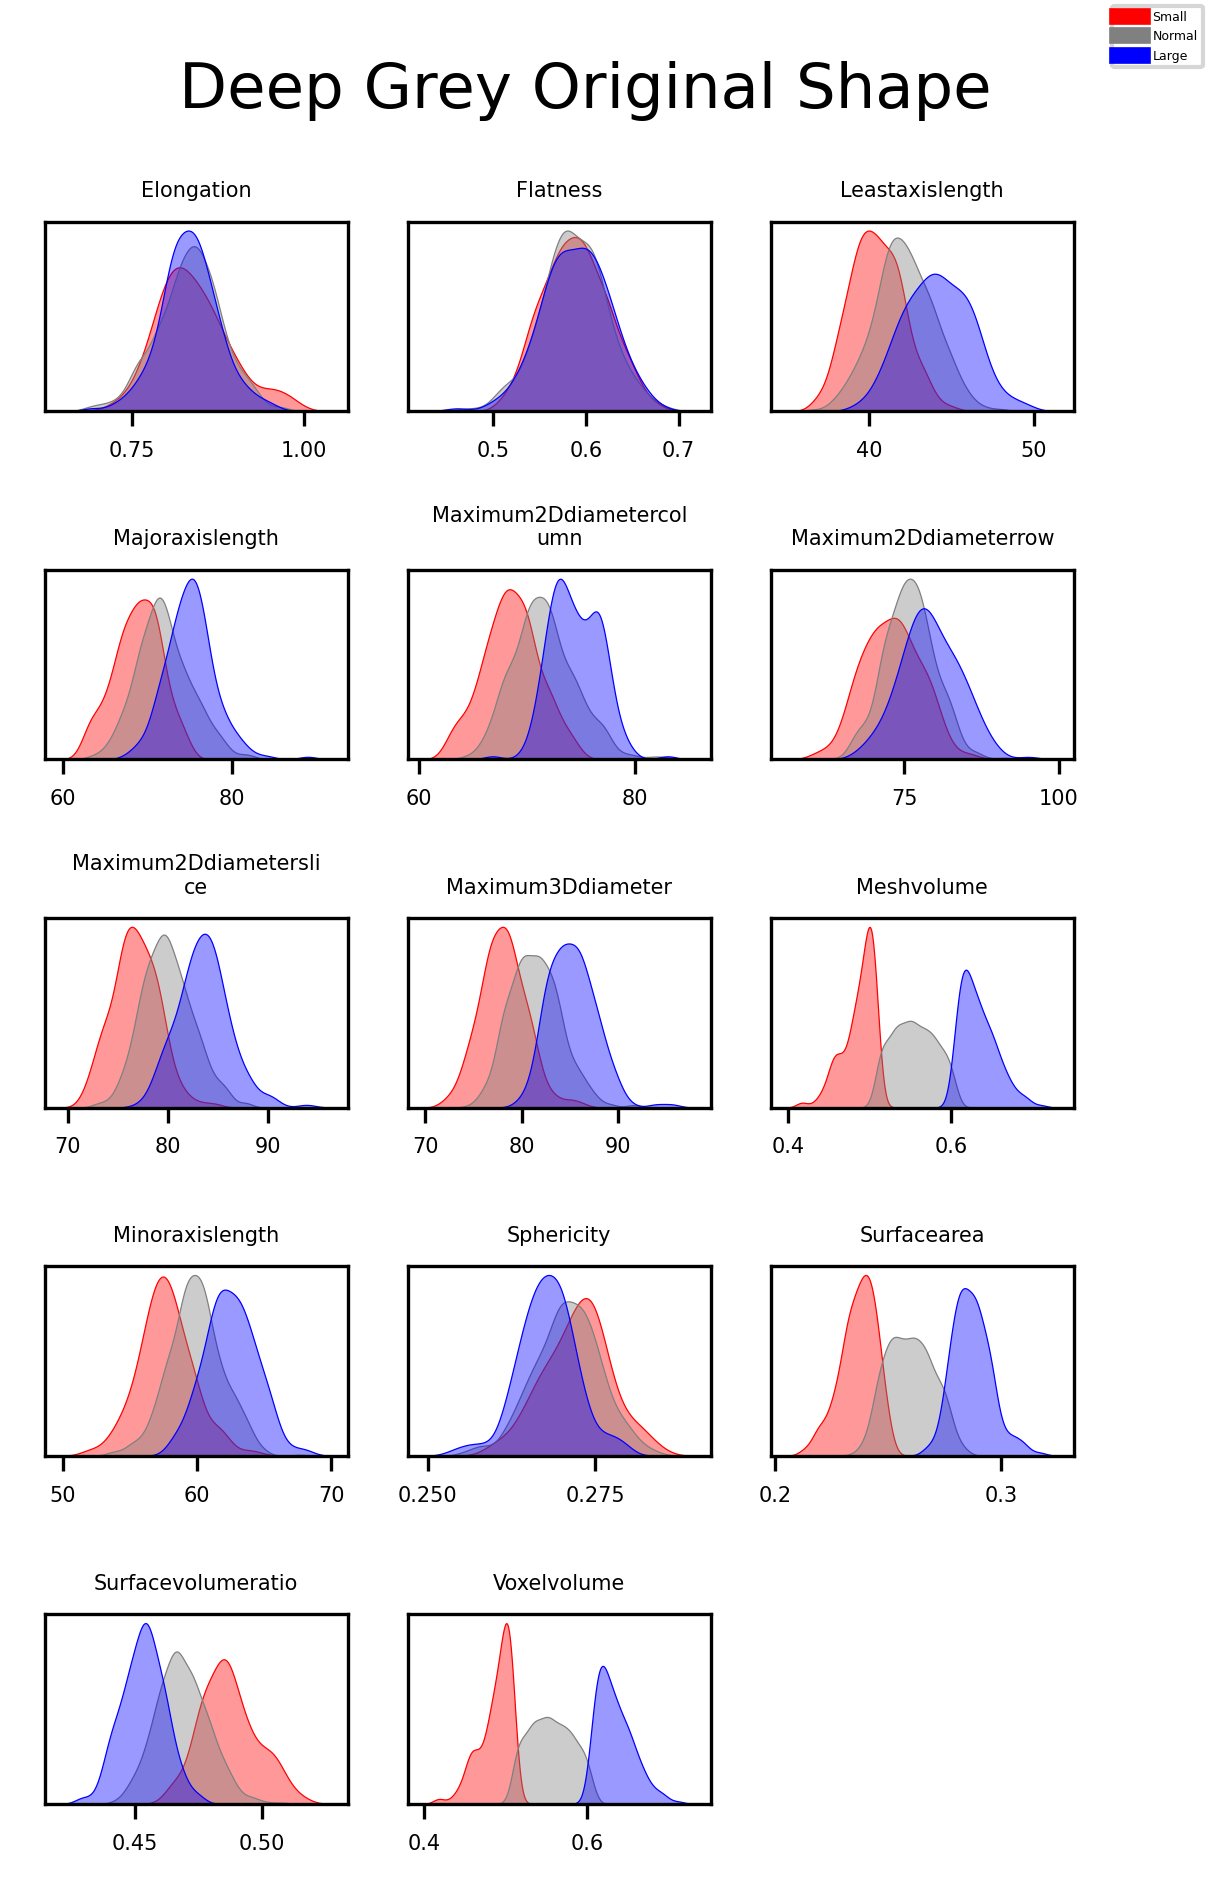

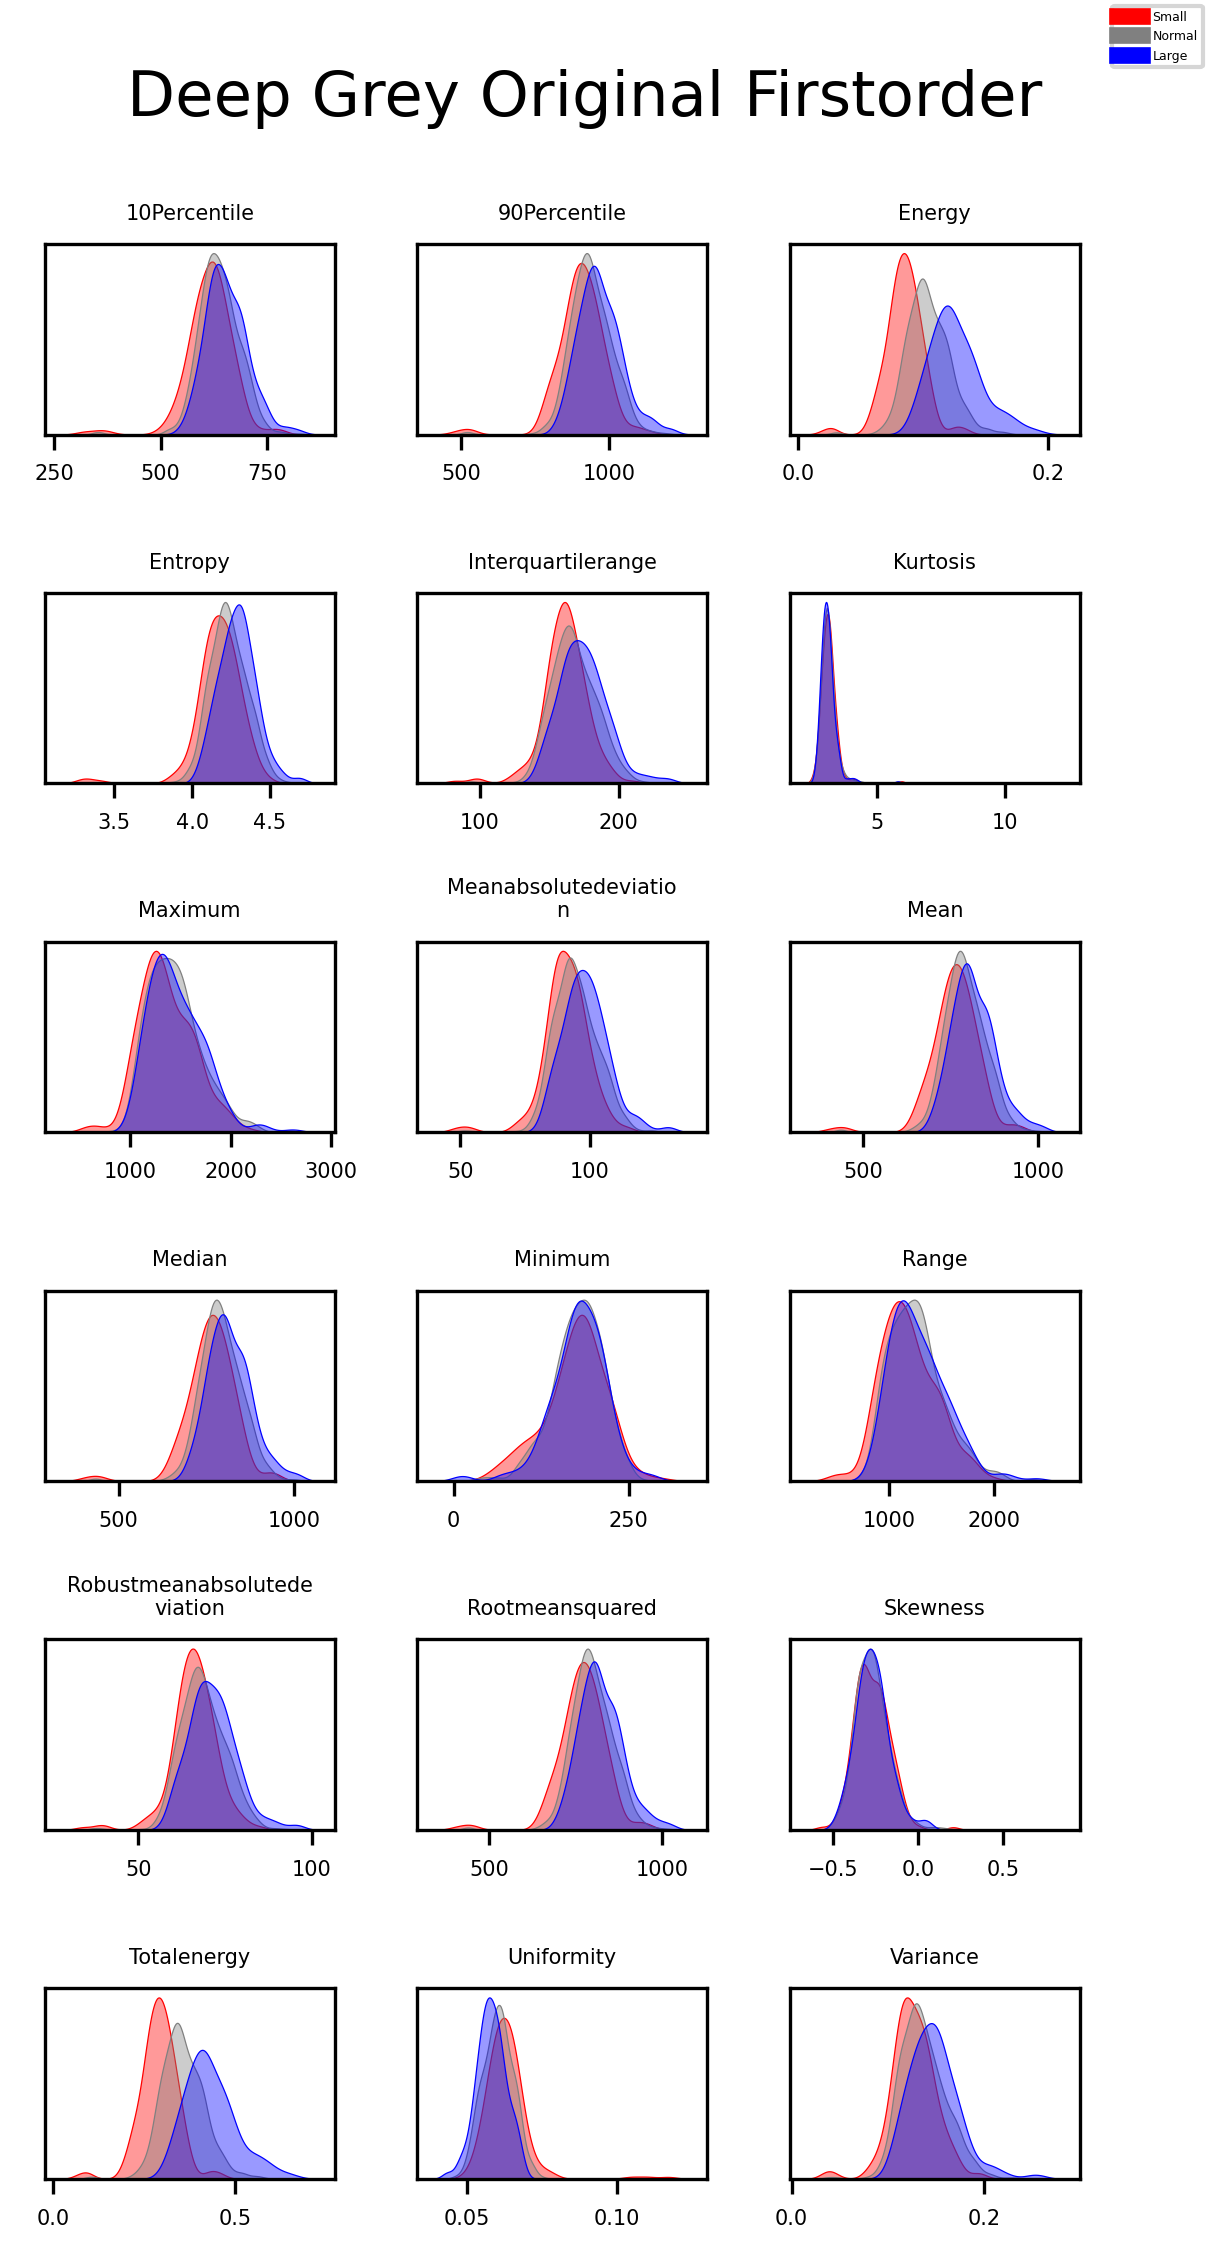

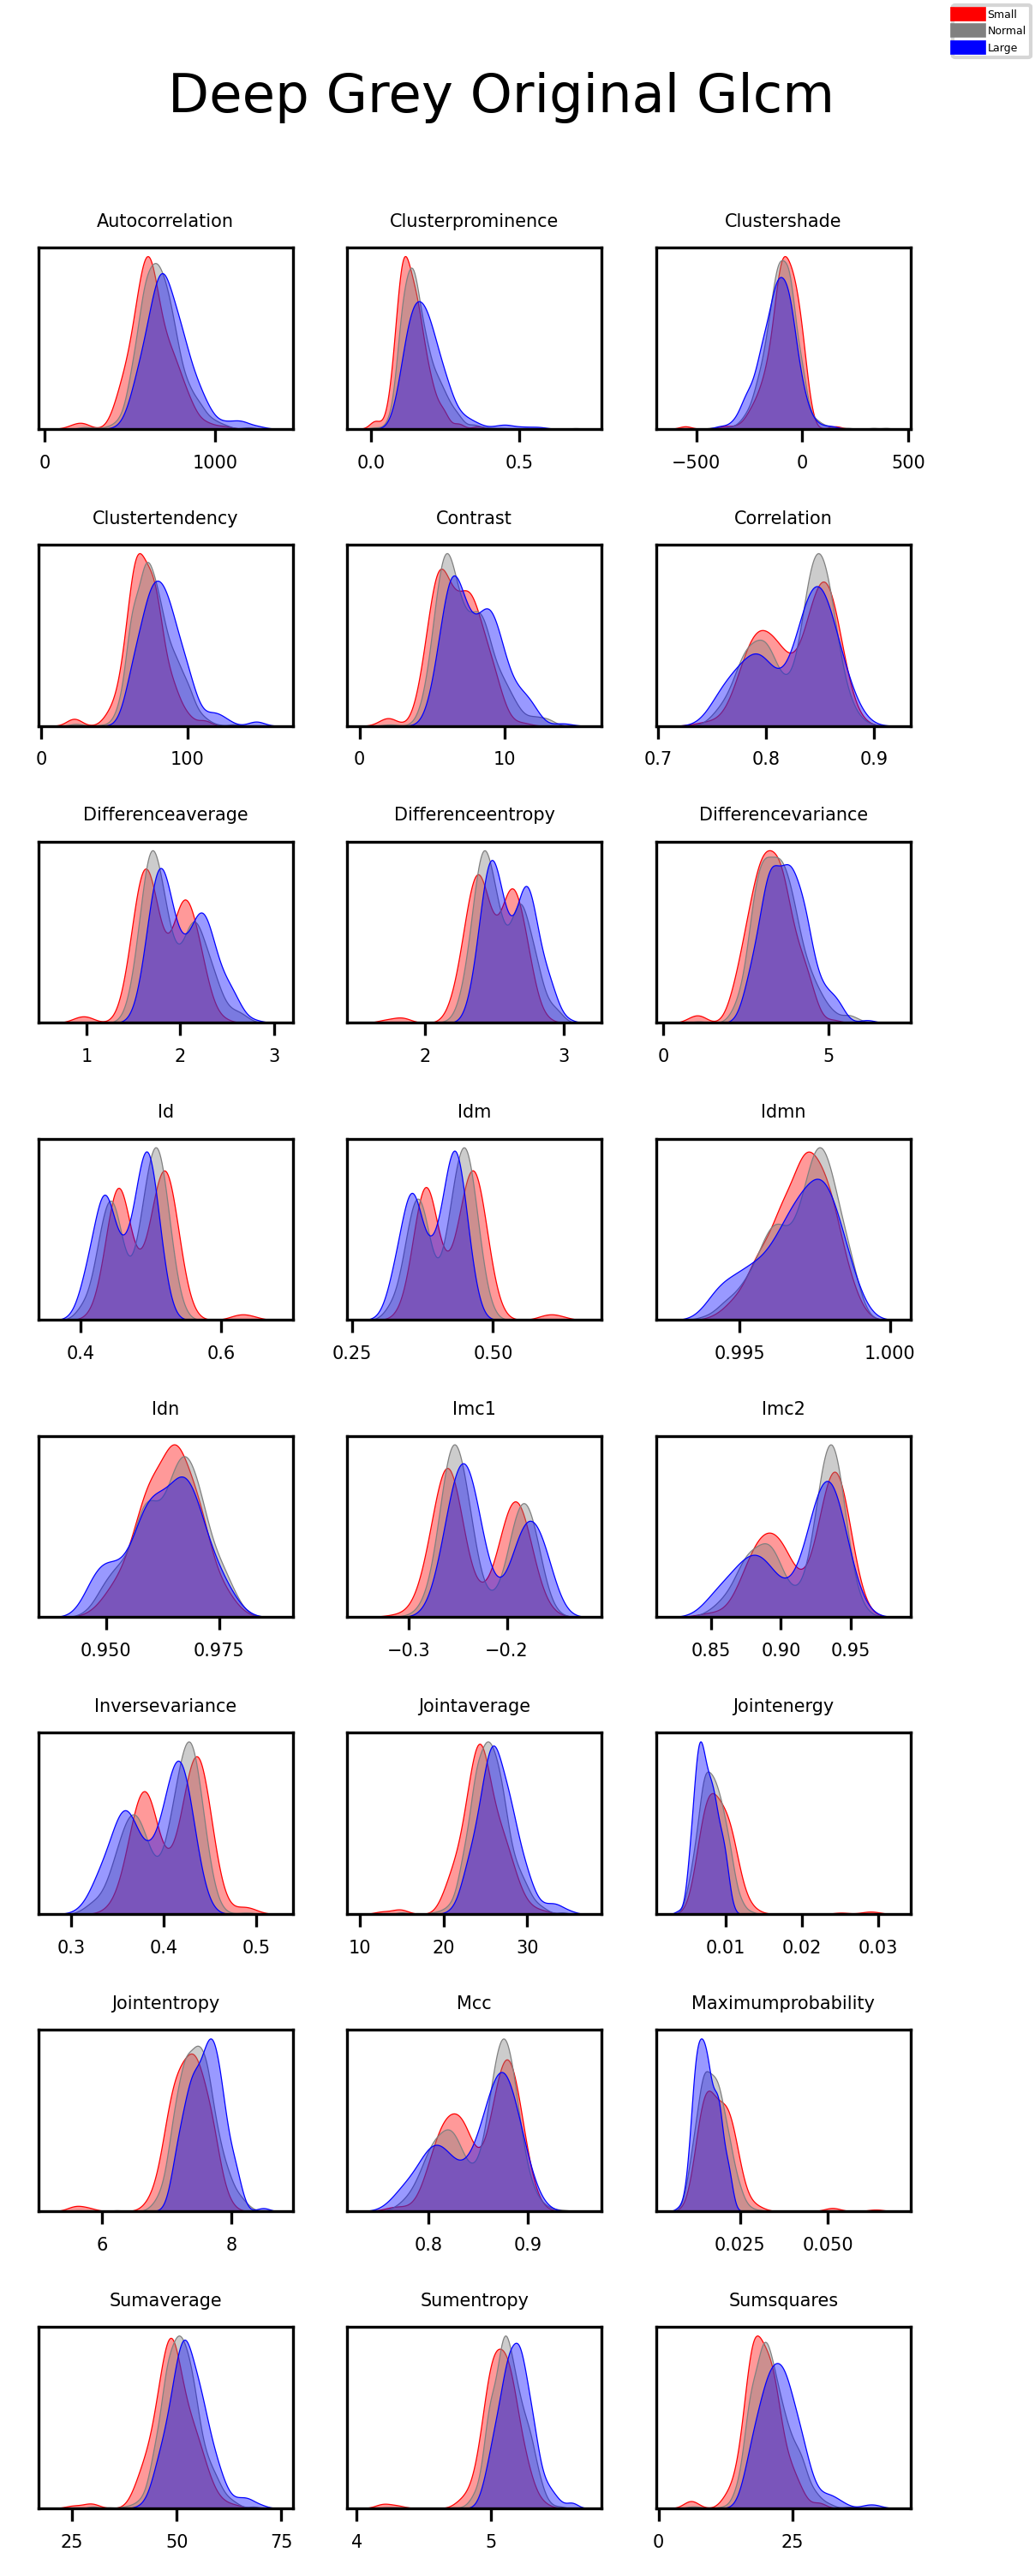

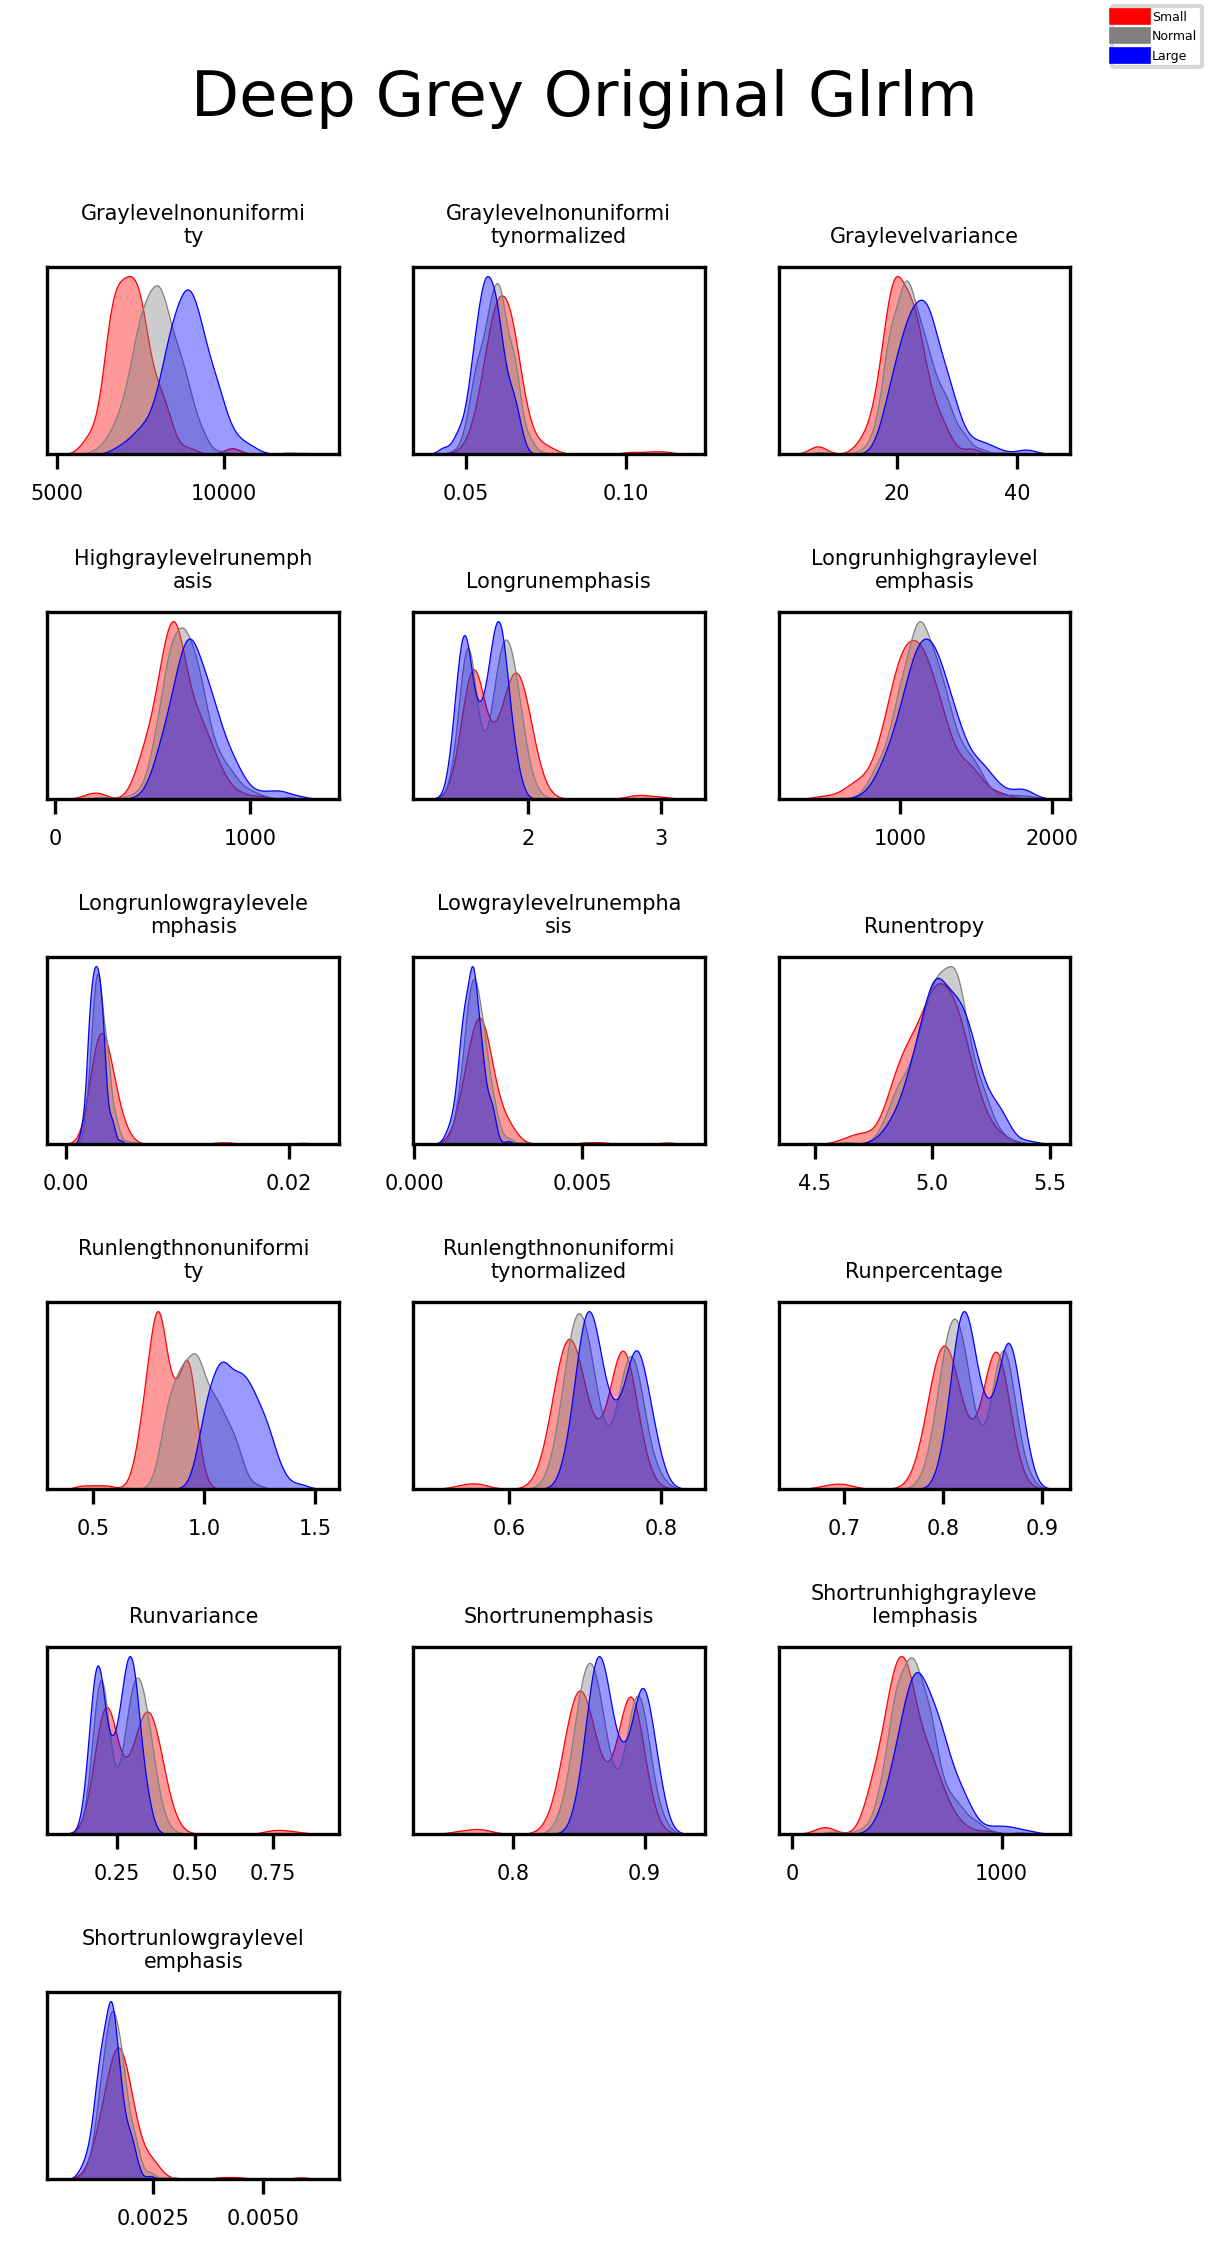

In [85]:
dist_folder = os.path.join(storage_dir , 'distribution_figures')
raw_dist_folder = os.path.join(dist_folder, 'raw_data')
os.makedirs(raw_dist_folder, exist_ok = True)
plot_all_dist(dfs[0], raw_dist_folder, disp = True)

# Data Cleaning
### Remove features that are basically size

### To remove from df's

- Brain_stem_original_shape_MeshVolume
- Brain_stem_original_shape_MinorAxisLength
- Brain_stem_original_shape_LeastAxisLength
- Brain_stem_original_shape_MajorAxisLength
- Brain_stem_original_shape_Maximum2DDiameterColumn
- Brain_stem_original_shape_Maximum2DDiameterRow
- Brain_stem_original_shape_SurfaceVolumeRatio
- Brain_stem_original_shape_VoxelVolume

In [59]:
rem_list = ['original_shape_MeshVolume','original_shape_MinorAxisLength','original_shape_LeastAxisLength',
            'original_shape_MajorAxisLength','original_shape_Maximum2DDiameterColumn',
            'original_shape_Maximum2DDiameterRow','original_shape_SurfaceVolumeRatio','original_shape_VoxelVolume', 
            'original_shape_SurfaceArea', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter']
counter=0
to_drop = []
for ind in data.index:
    for rem in rem_list:
        if rem in ind:
            counter+=1
            to_drop.append(ind)
            break
            

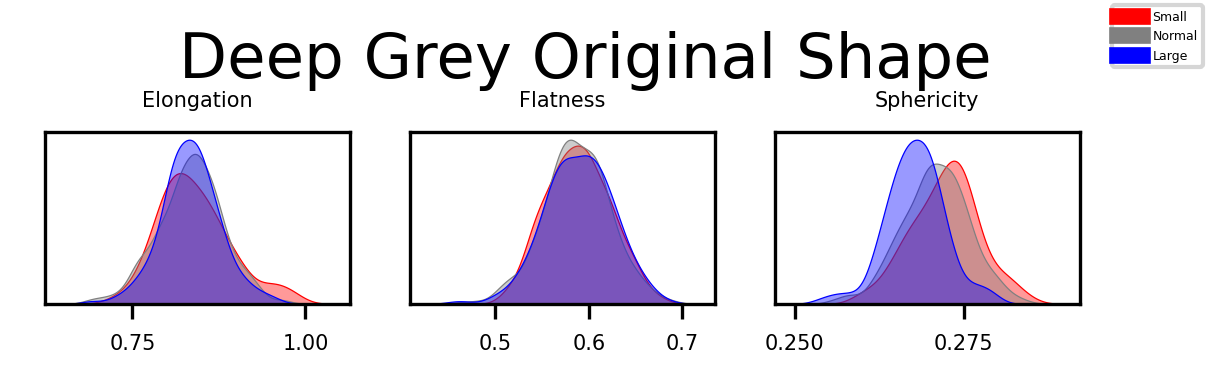

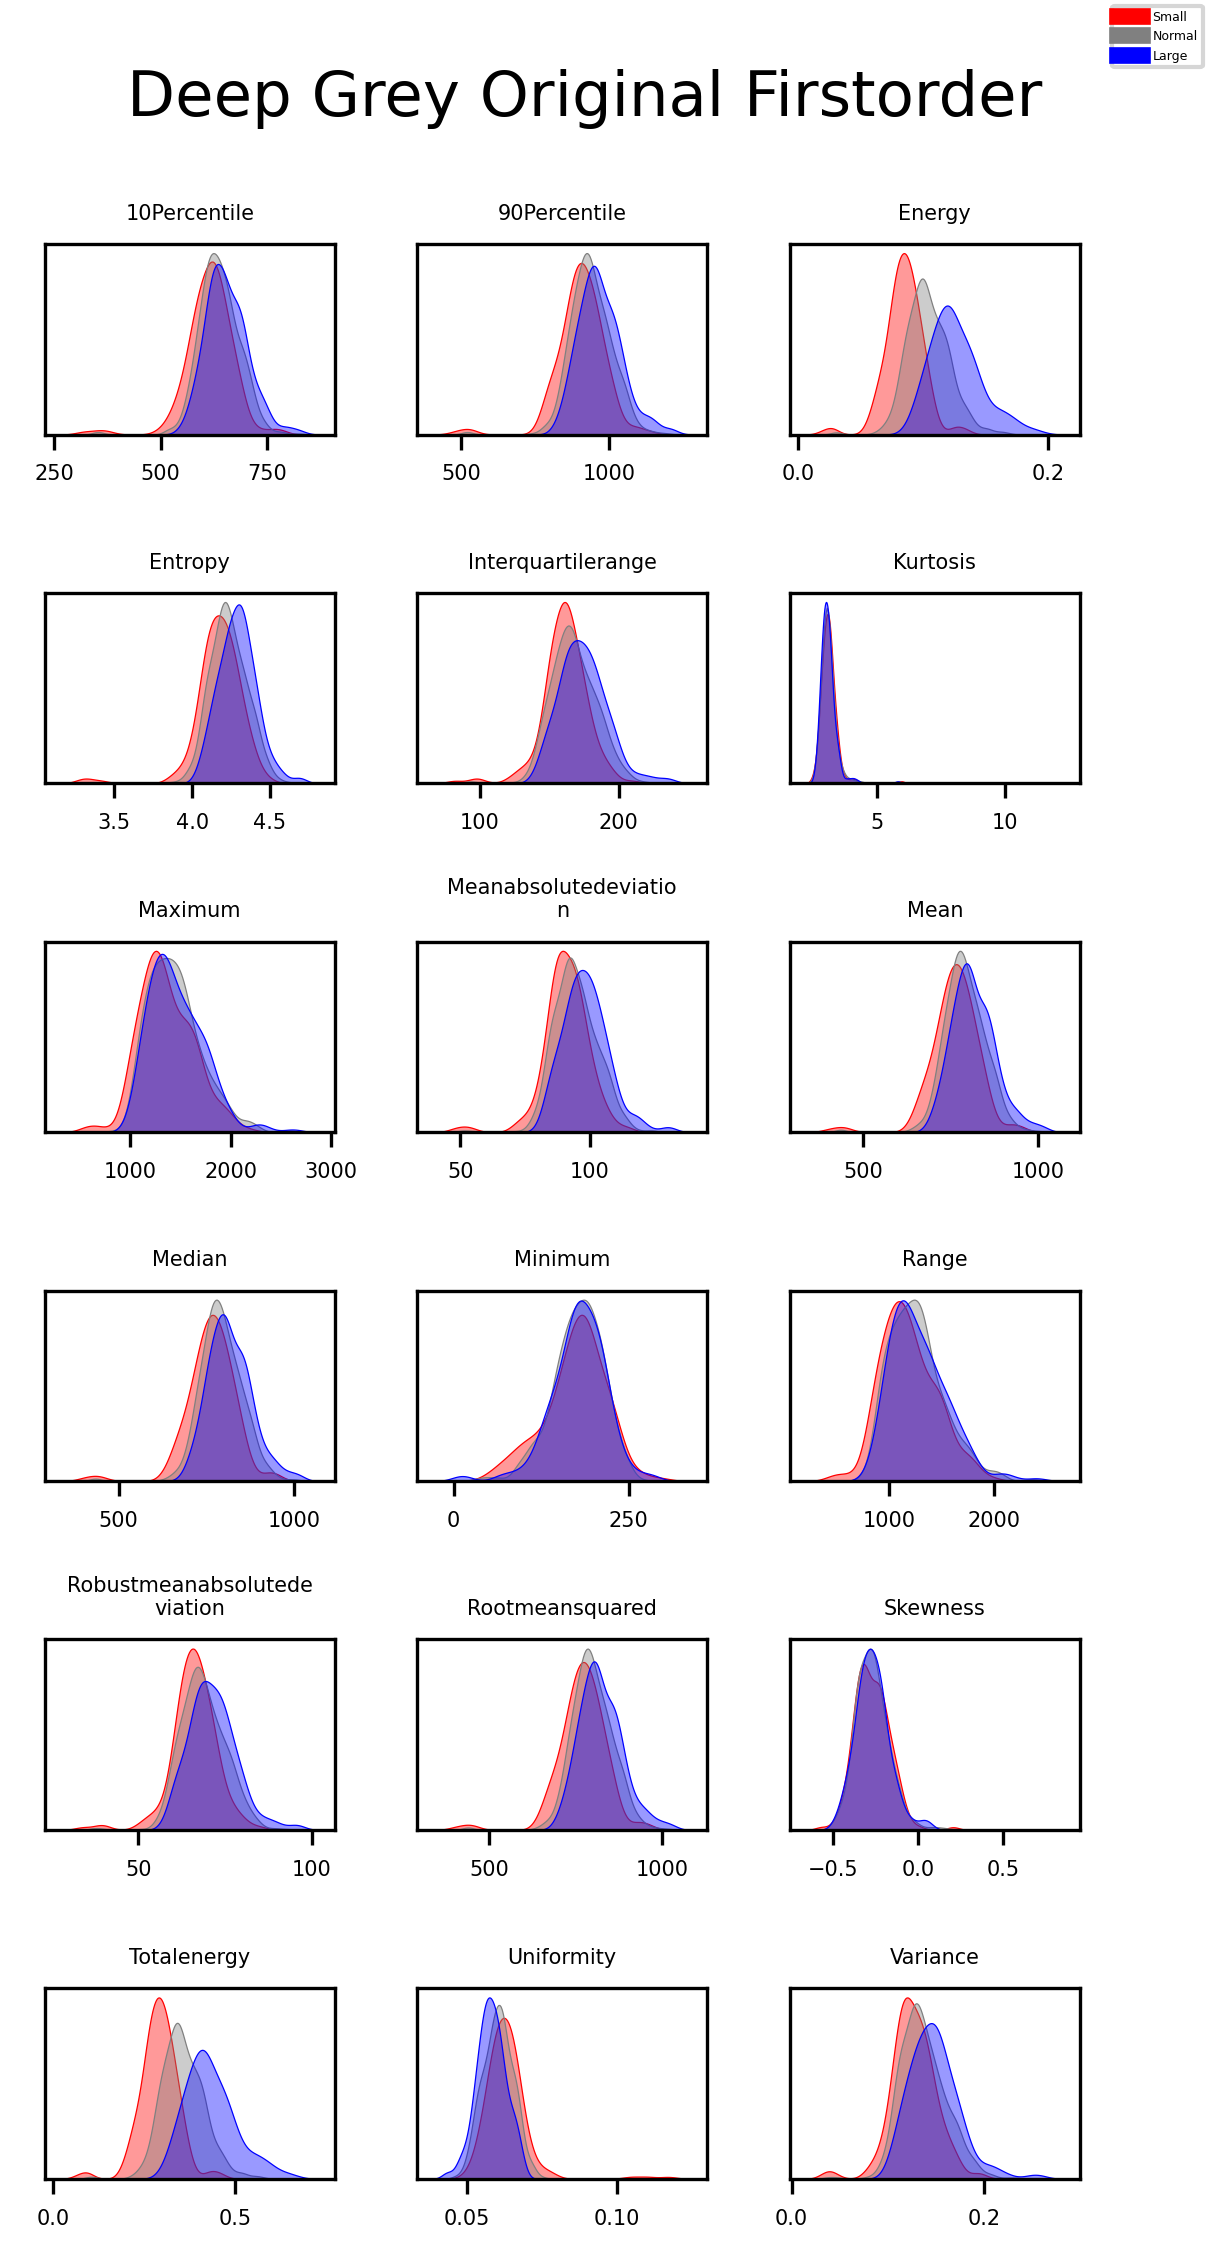

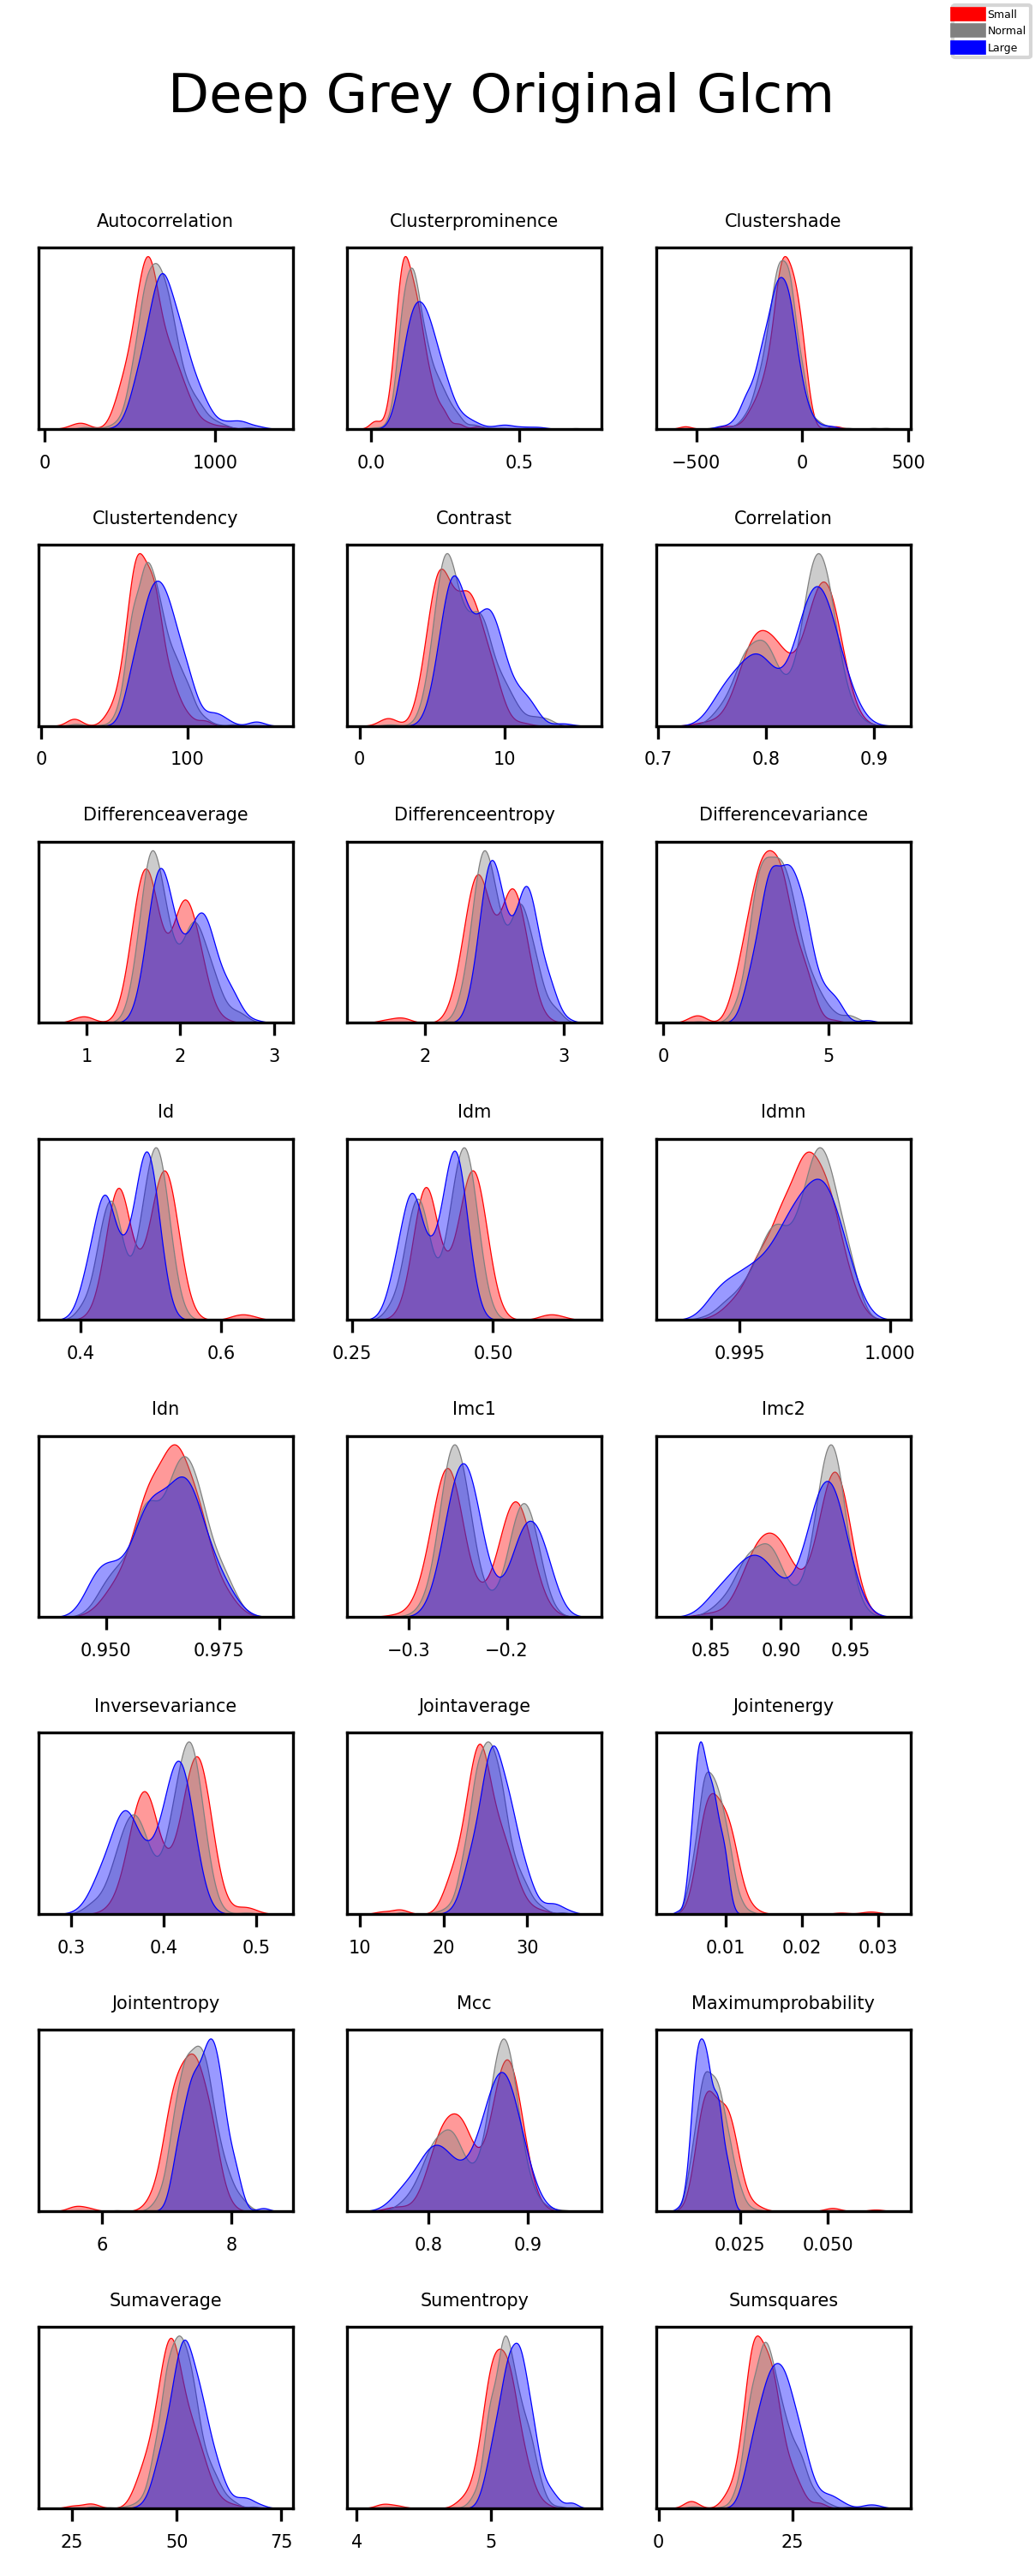

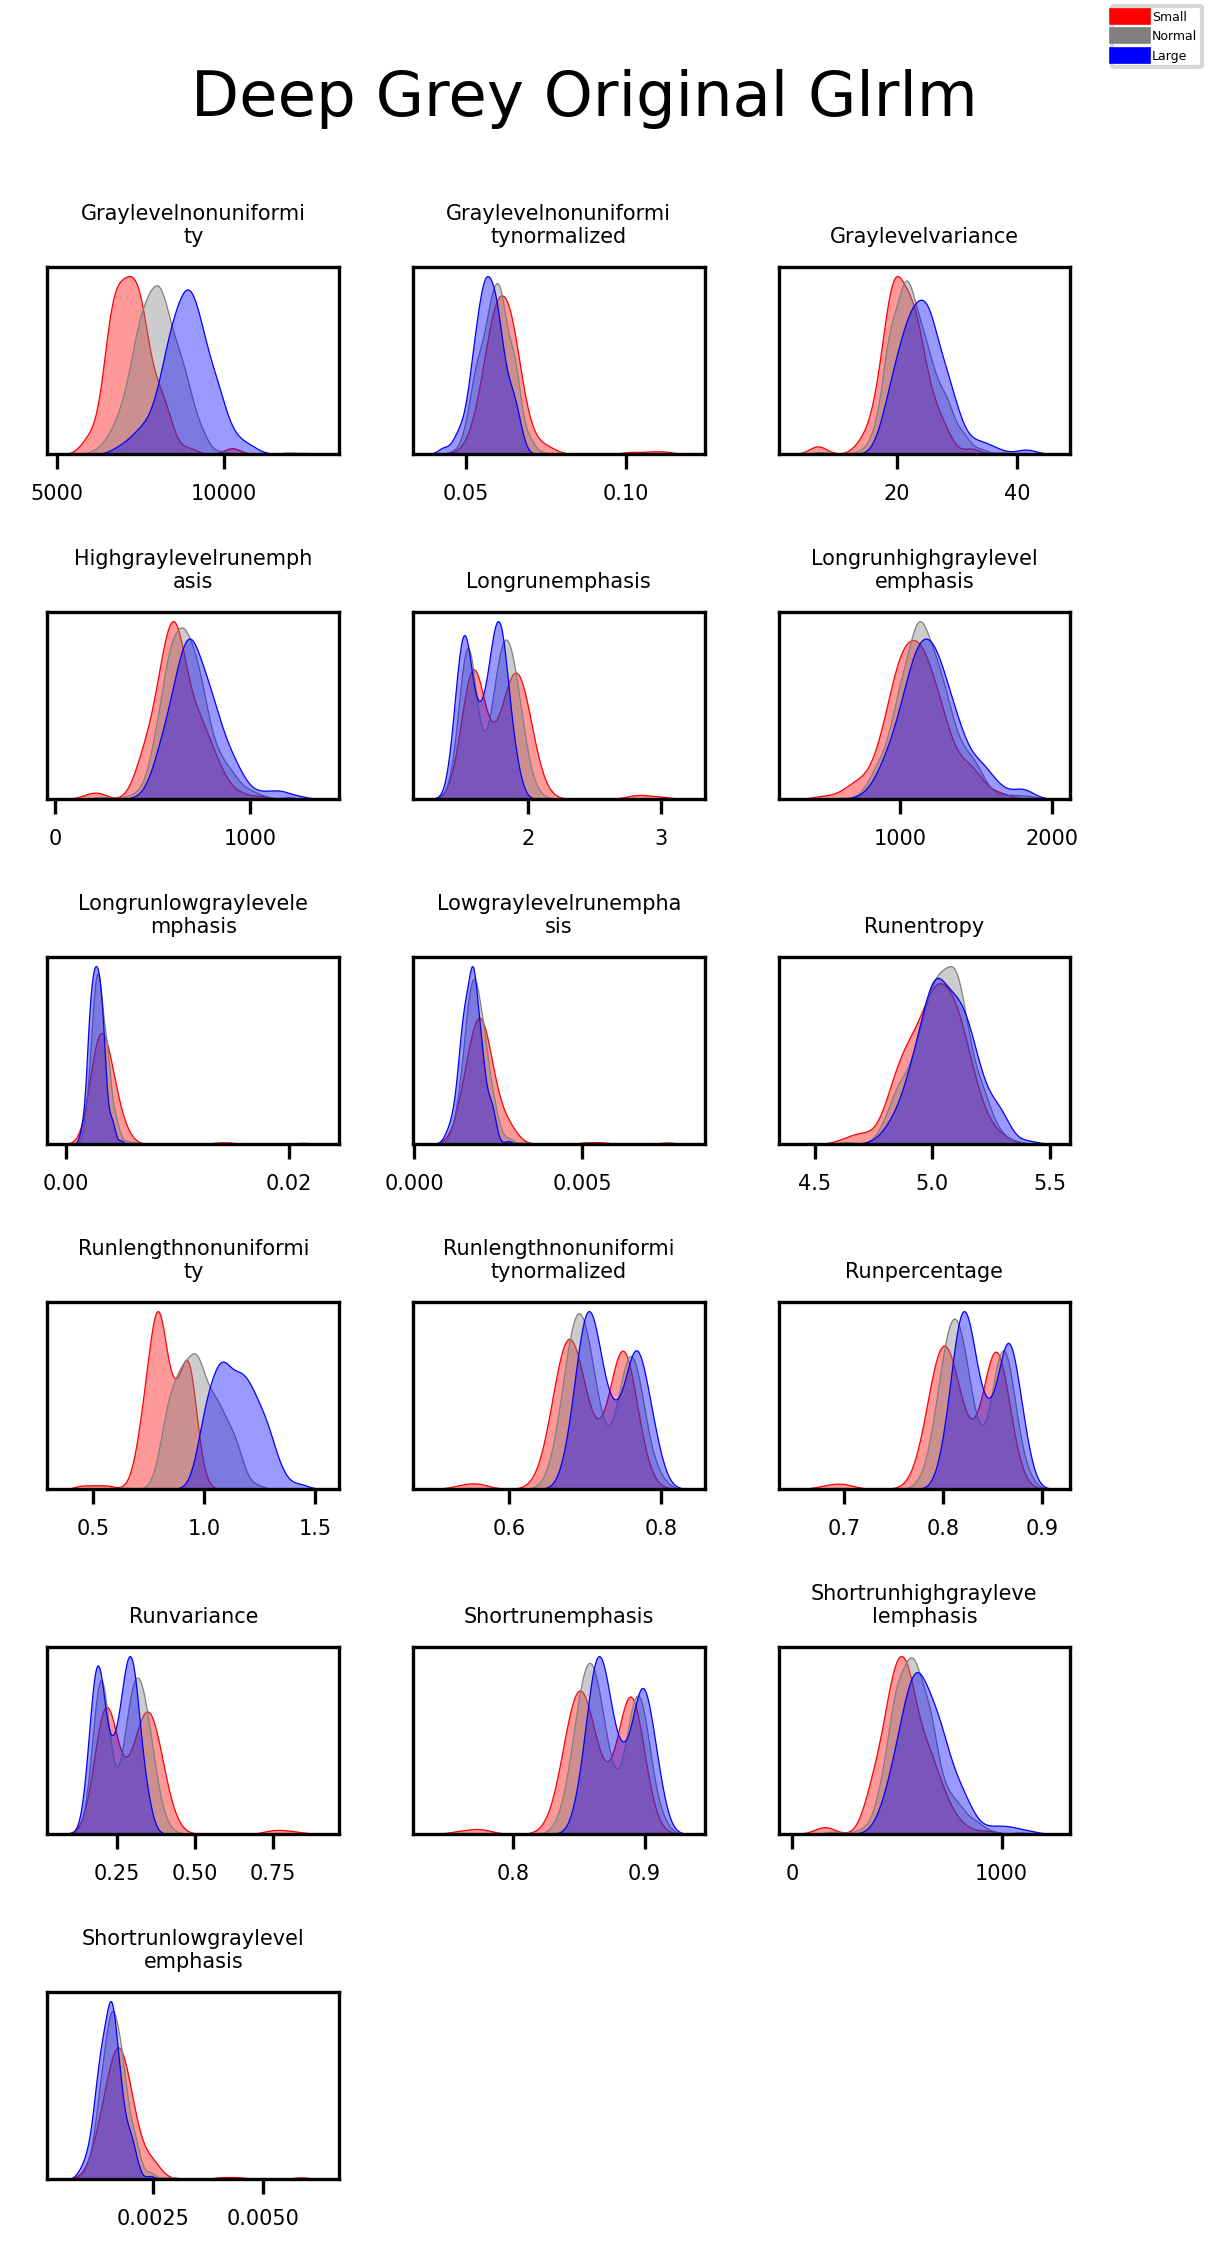

In [86]:
# Drop features and remake cleaned dfs
# then plot figures to see that we're happy. 

clean_data = data.drop(to_drop, axis = 0)
clean_dfs = setup_data(clean_data)

dist_folder = os.path.join(storage_dir , 'distribution_figures')
clean_dist_folder = os.path.join(dist_folder, 'cleaned_data')
os.makedirs(clean_dist_folder, exist_ok = True)


plot_all_dist(clean_dfs[0], clean_dist_folder, disp = True)

In [75]:
# save cleaned data

save_loc = os.path.join(storage_dir, '2021-11-23_cleaned_data.csv')
clean_data.to_csv(save_loc, sep = ',', header = True, index=True)

# Further cleaning b/c shape features could be cheating'

In [93]:
# Cleaning Data
rem_list = ['original_shape_MeshVolume','original_shape_MinorAxisLength','original_shape_LeastAxisLength',
            'original_shape_MajorAxisLength','original_shape_Maximum2DDiameterColumn',
            'original_shape_Maximum2DDiameterRow','original_shape_SurfaceVolumeRatio','original_shape_VoxelVolume', 
            'original_shape_SurfaceArea', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_']
counter=0
to_drop_shape = []
for ind in data.index:
    for rem in rem_list:
        if rem in ind:
            counter+=1
            to_drop_shape.append(ind)
            break

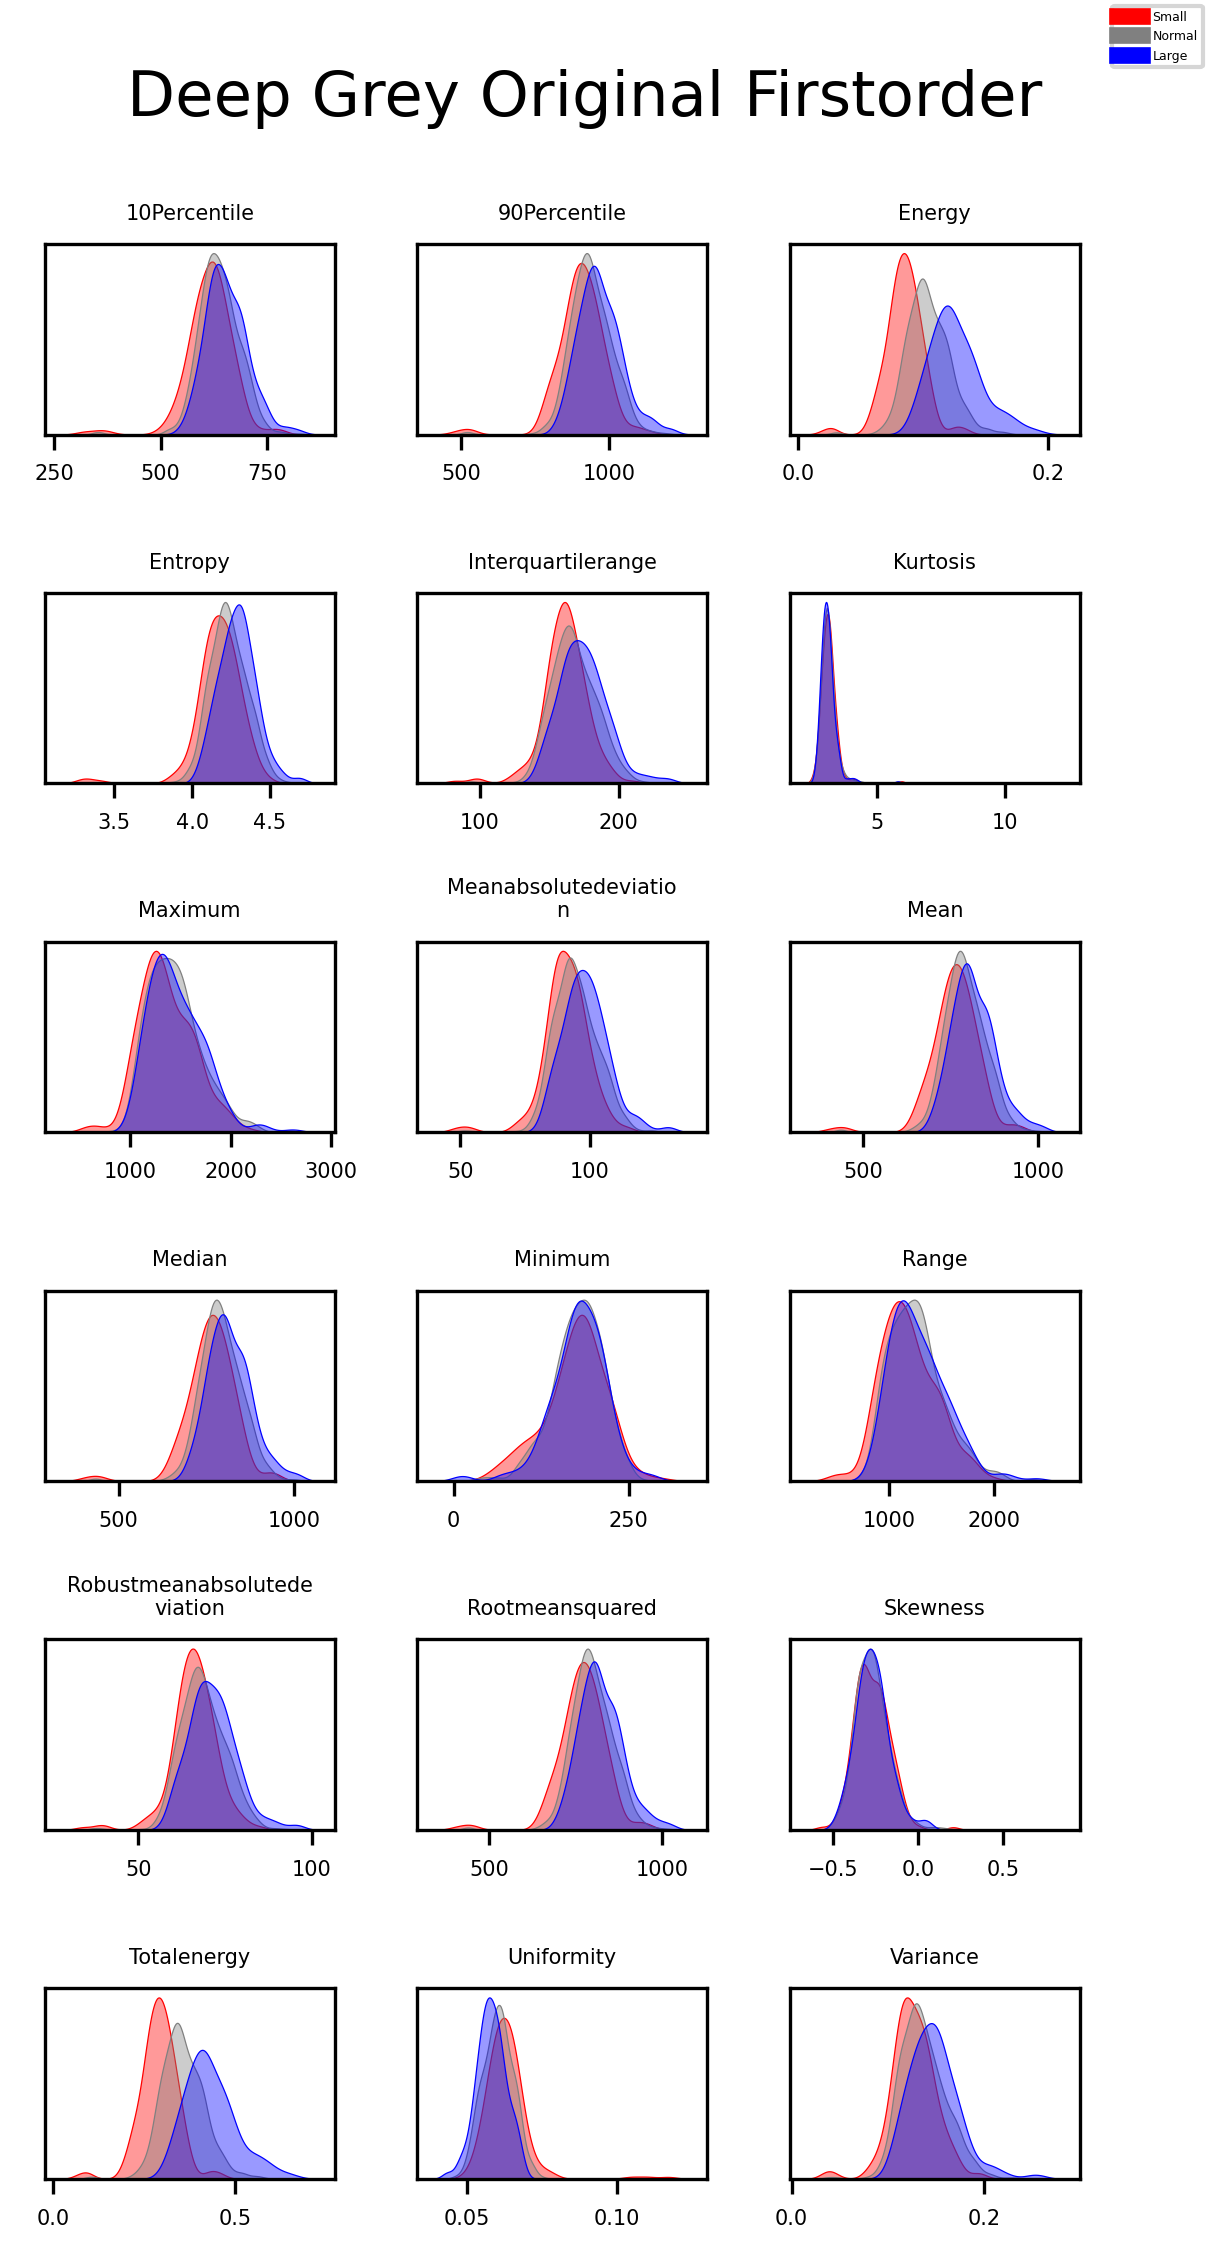

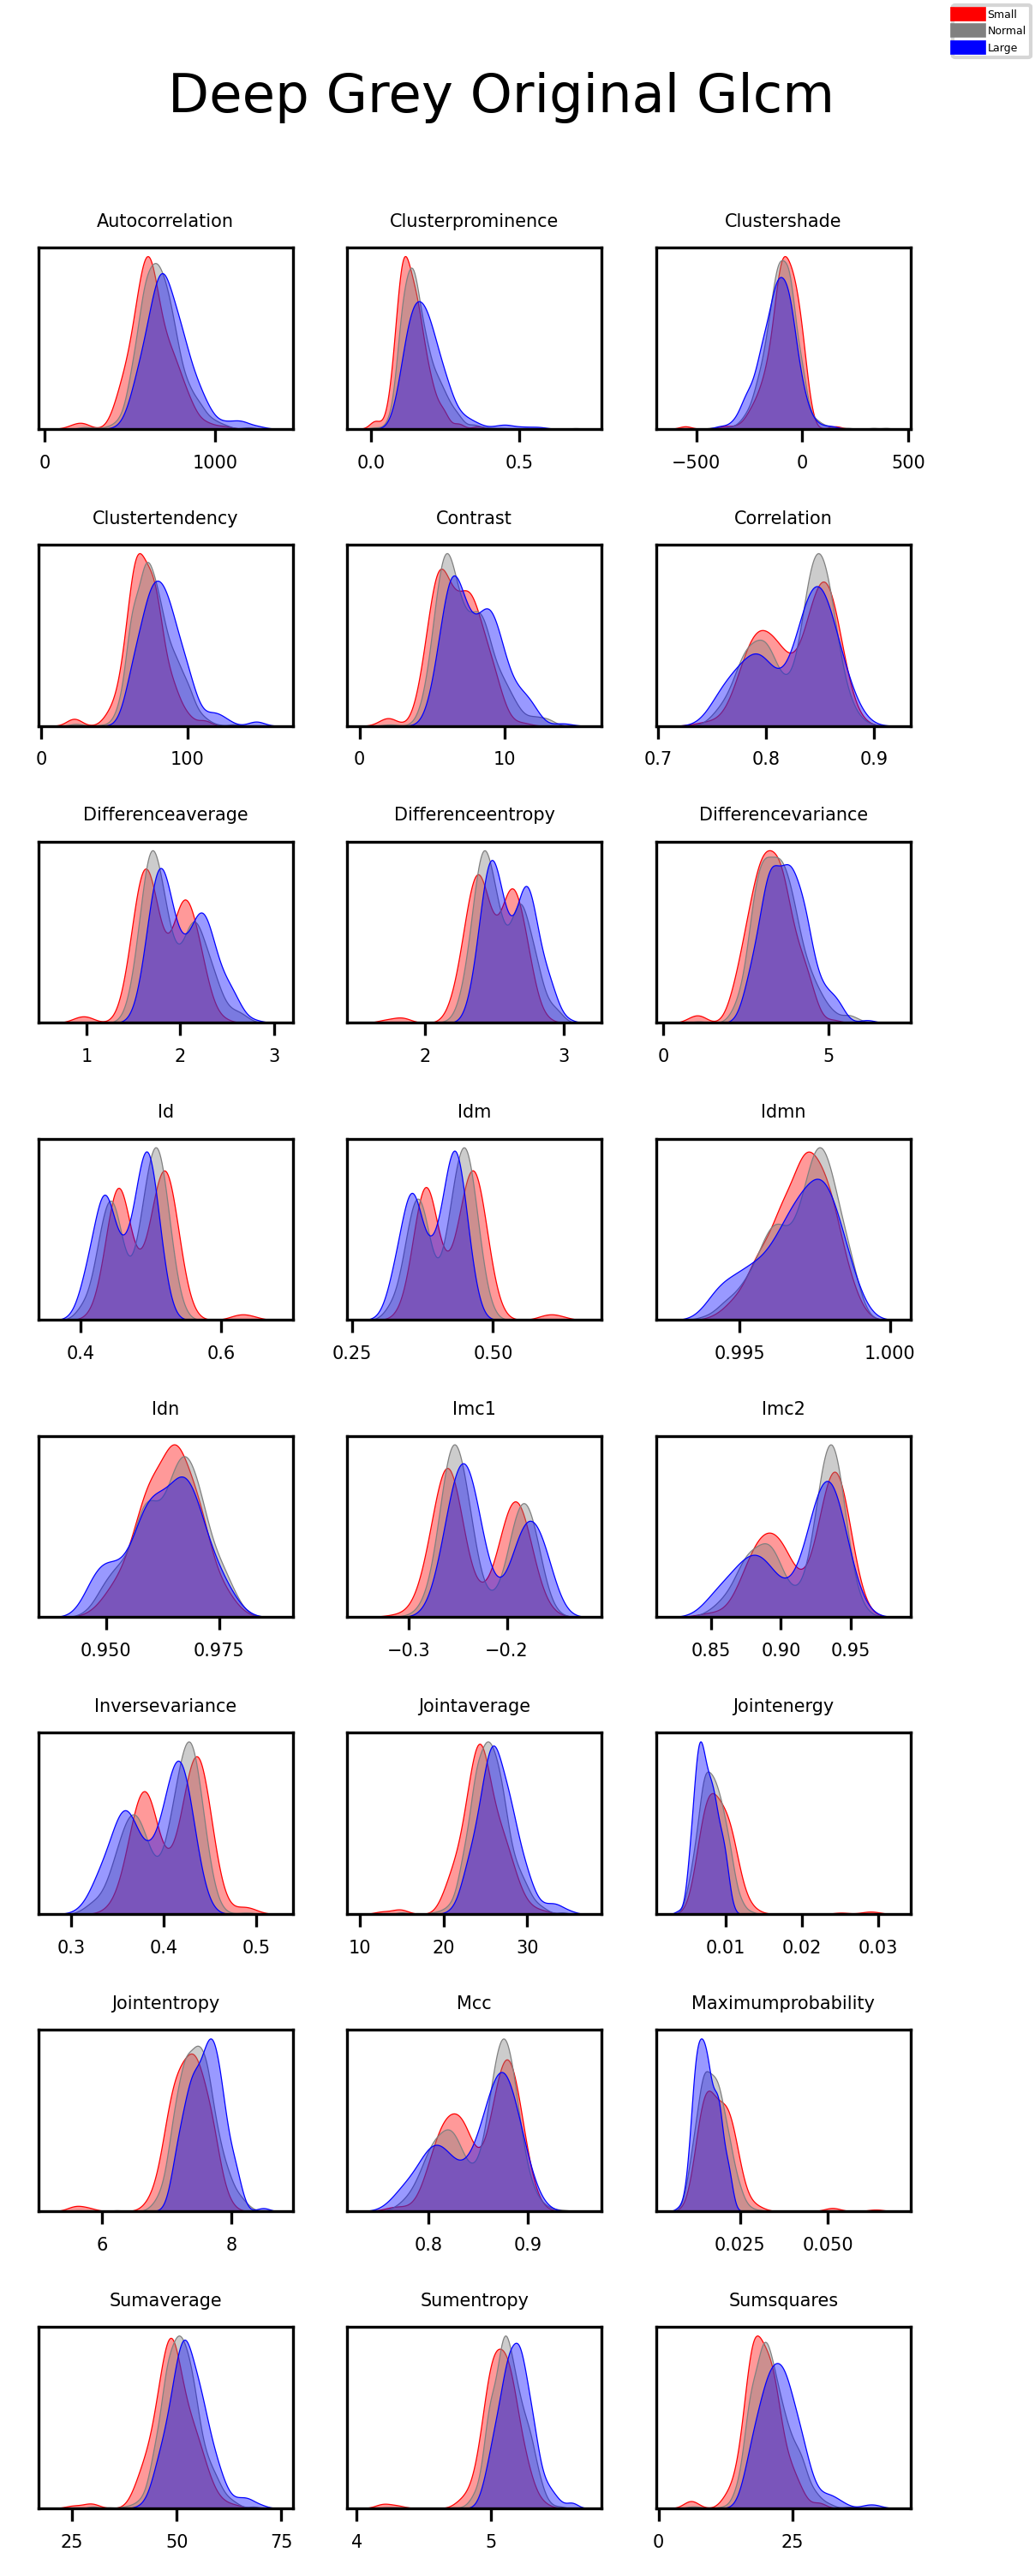

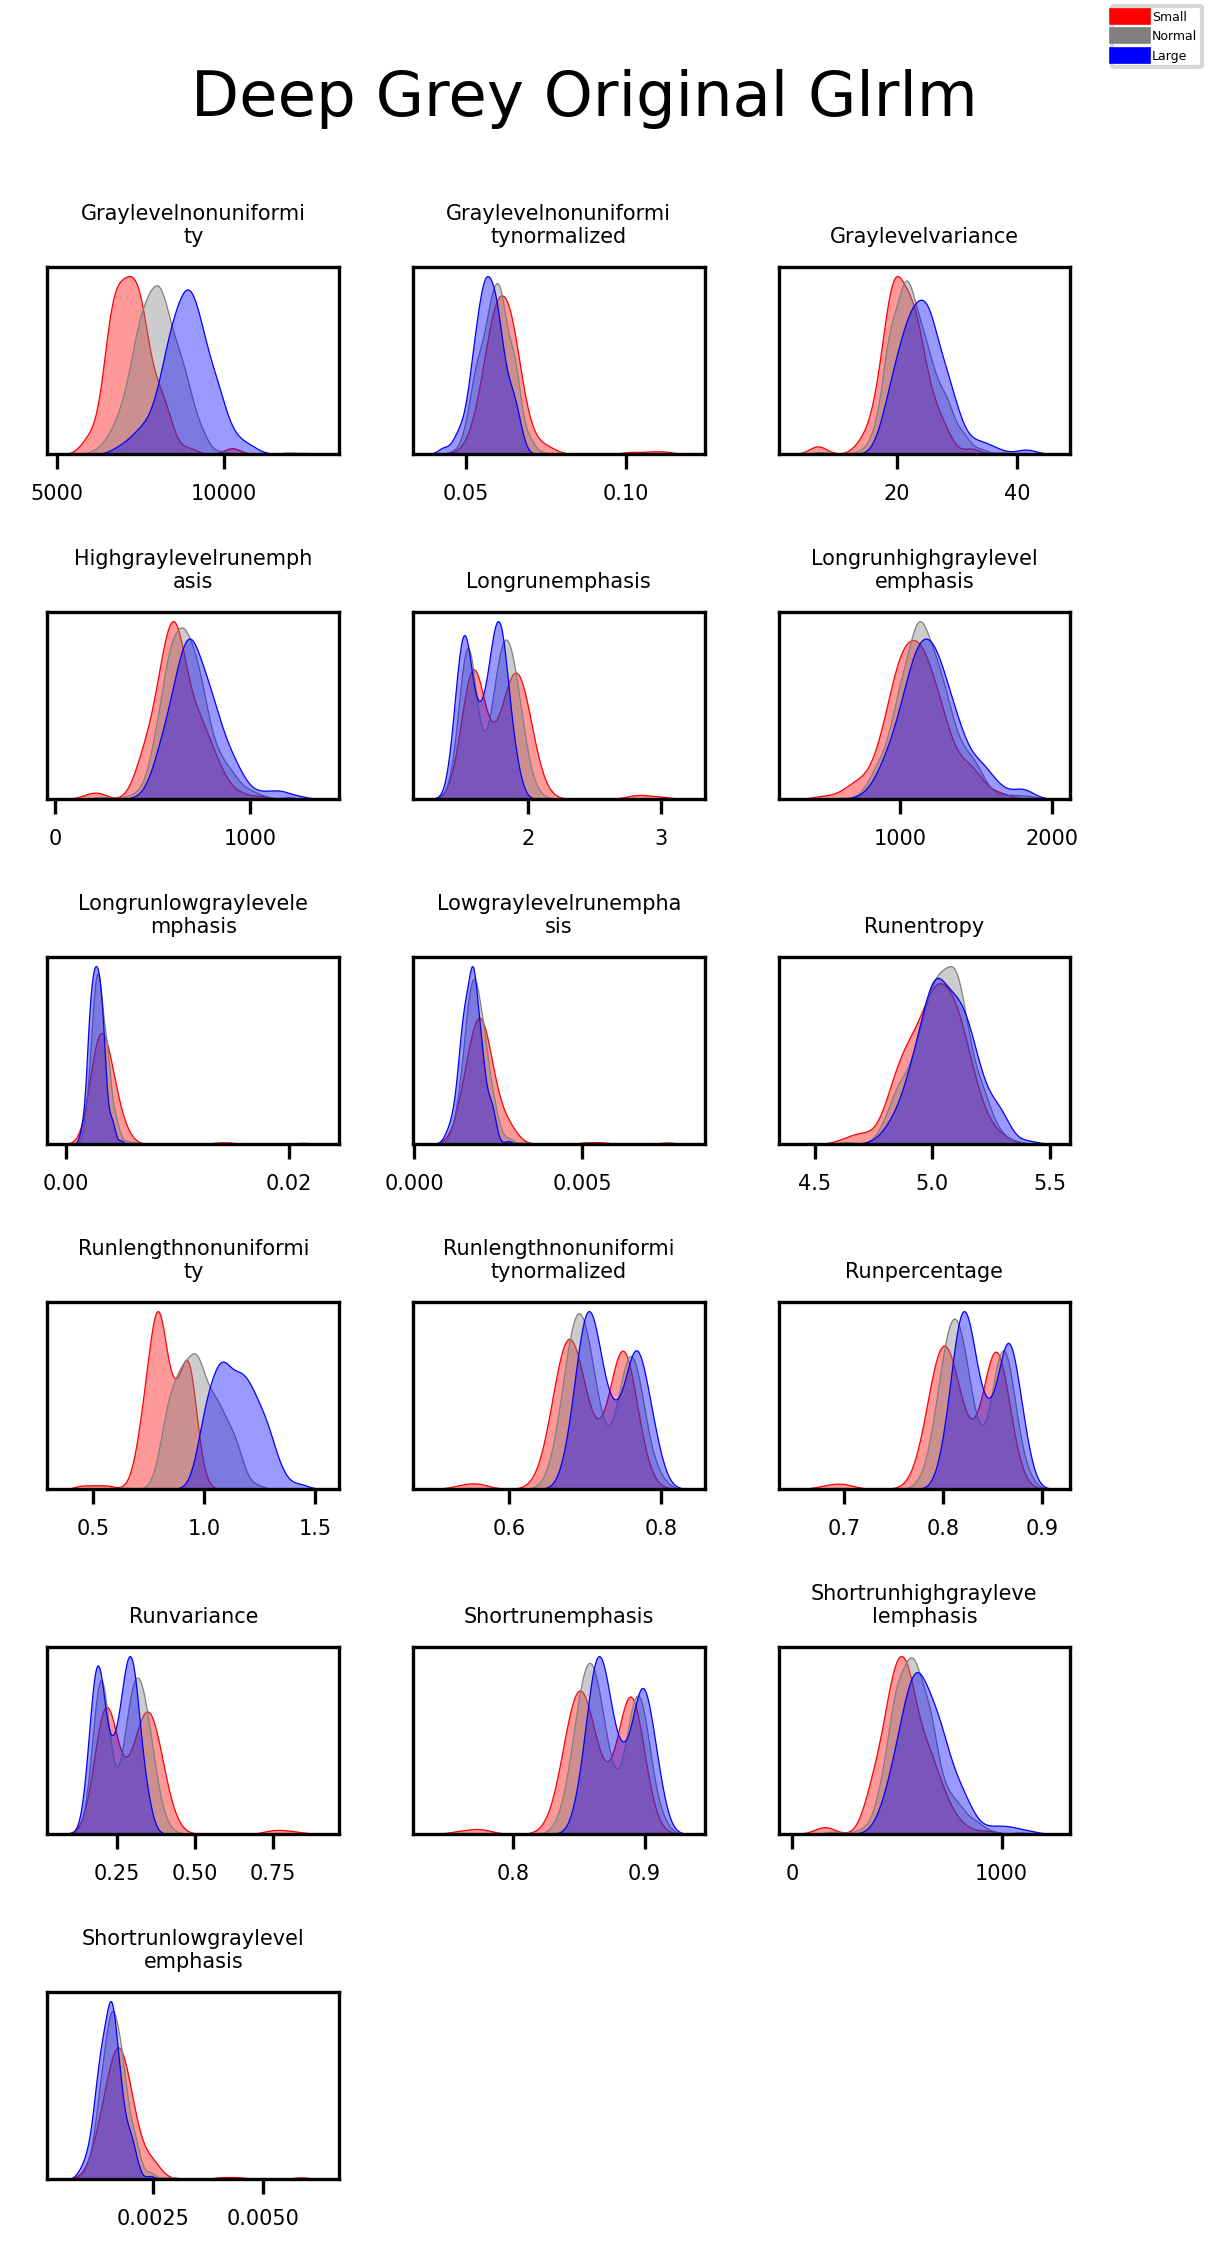

In [99]:
# Drop features and remake cleaned dfs
# then plot figures to see that we're happy. 

no_shape_data = data.drop(to_drop_shape, axis = 0)
no_shape_dfs = setup_data(no_shape_data)

dist_folder = os.path.join(storage_dir , 'distribution_figures')
no_shape_dist_folder = os.path.join(dist_folder, 'no_shape_data')
os.makedirs(no_shape_dist_folder, exist_ok = True)


plot_all_dist(no_shape_dfs[0], no_shape_dist_folder, disp = True)

In [100]:
# save cleaned data

save_loc = os.path.join(storage_dir, '2021-11-23_no_shape_data.csv')
no_shape_data.to_csv(save_loc, sep = ',', header = True, index=True)